# EDA on Stroke data
Link to dataset: [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

## Import
Import necessary libraries and read the dataset.

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Explore the dataset and check for missing data.

In [4]:
strokeDF = pd.read_csv('healthcare-dataset-stroke-data.csv')  # Read CSV file into dataframe.
strokeDF.head()  # Get and print the first 5 rows.

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
strokeDF.info()  # Getting information about the dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are missing data in the 'bmi' column.

## Exploratory Data Analysis

In [11]:
print(strokeDF.shape)  # Get rows and columns from dataframe.
print('The dataset has {} rows and {} columns.'.format(strokeDF.shape[0], strokeDF.shape[1]))

(5110, 12)
The dataset has 5110 rows and 12 columns.


In [12]:
strokeDF.describe()  # Generate descriptive statistics on the dataframe.

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
strokeDF.describe(include='object')  # Generate descriptive statistics including object types.

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


### Summary Statistics

In [21]:
# Calculate mean for each numerical field.
strokeDF.mean()

id                   36517.829354
age                     43.226614
hypertension             0.097456
heart_disease            0.054012
avg_glucose_level      106.147677
bmi                     28.893237
stroke                   0.048728
dtype: float64

In [27]:
# Calculate median for each numerical field.
strokeDF.median()

id                   36932.000
age                     45.000
hypertension             0.000
heart_disease            0.000
avg_glucose_level       91.885
bmi                     28.100
stroke                   0.000
dtype: float64

In [30]:
# Calculate standard deviation for each numerical field.
strokeDF.std()

id                   21161.721625
age                     22.612647
hypertension             0.296607
heart_disease            0.226063
avg_glucose_level       45.283560
bmi                      7.854067
stroke                   0.215320
dtype: float64

In [31]:
# Calculate variance for each numerical field.
strokeDF.var()

id                   4.478185e+08
age                  5.113318e+02
hypertension         8.797552e-02
heart_disease        5.110447e-02
avg_glucose_level    2.050601e+03
bmi                  6.168636e+01
stroke               4.636264e-02
dtype: float64

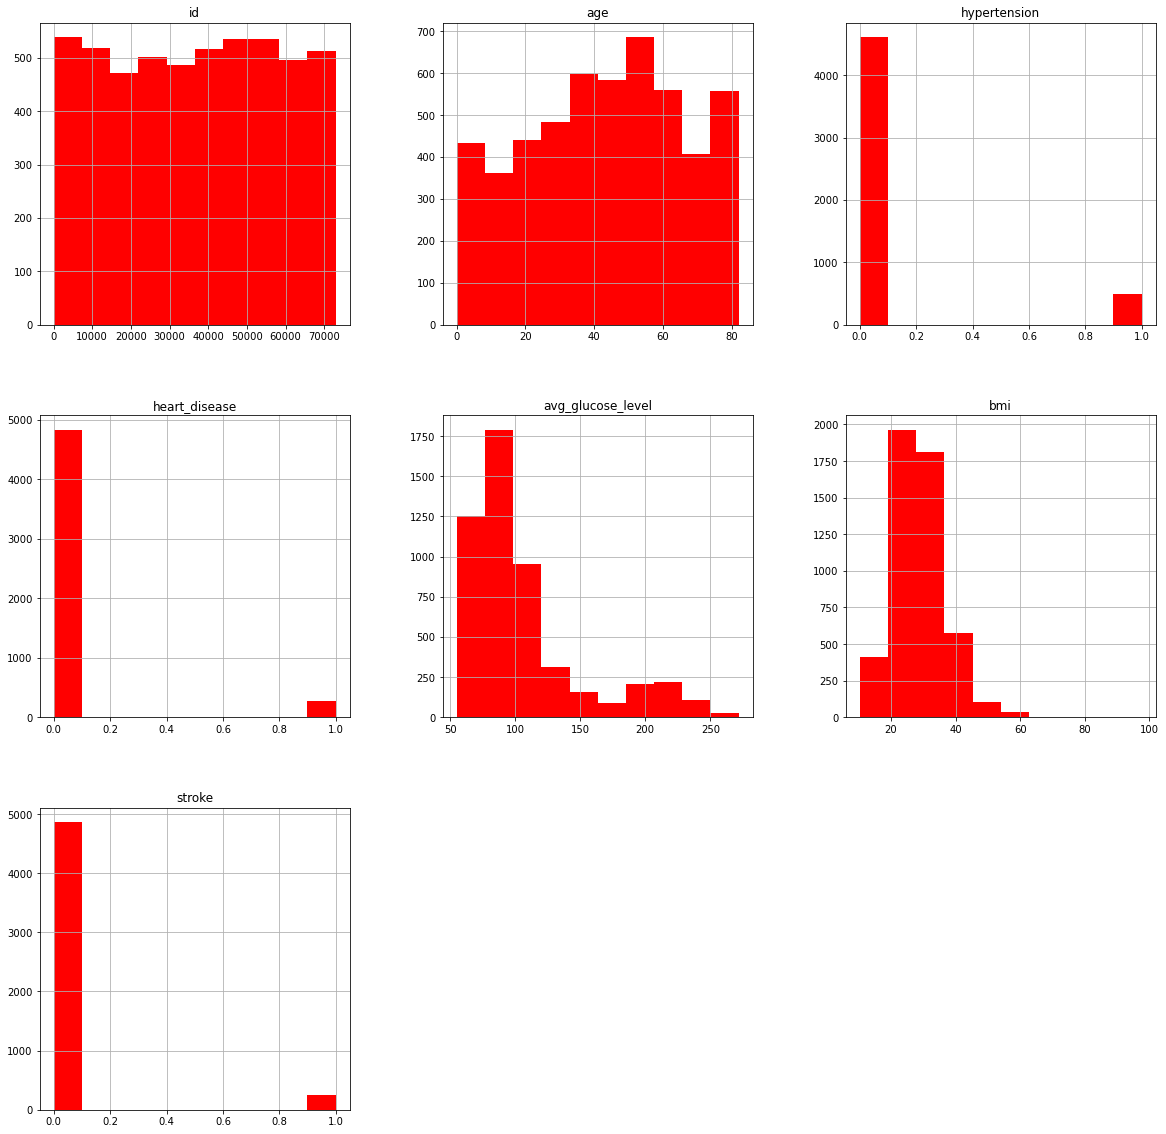

In [69]:
# Data distribution
strokeDF.hist(figsize=(20,20), color='red')
plt.show()

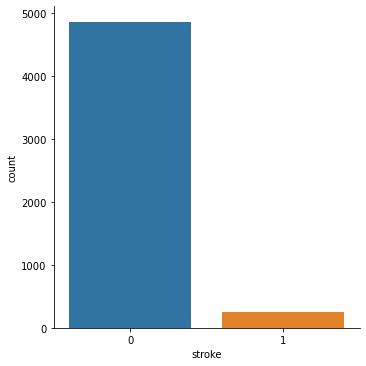

In [36]:
# Use seaborn to lot a histogram to compare count of stroke.
sns.factorplot('stroke',data=strokeDF,kind='count')

In [45]:
print("Number of patient with stroke:     " + str(len(strokeDF[strokeDF['stroke'] == 1])))
print("Number of patient without stroke: " + str(len(strokeDF[strokeDF['stroke'] == 0])))

Number of patient with stroke:     249
Number of patient without stroke: 4861


We have more patients with no stroke than stroke in this dataset.

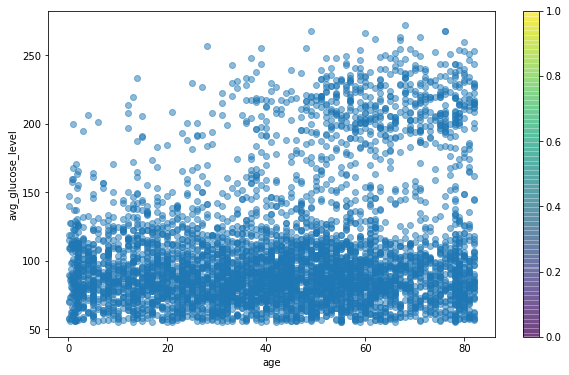

In [59]:
plt.figure(figsize = (10,6))
plt.scatter(x=strokeDF['age'], y=strokeDF['avg_glucose_level'], alpha=0.5)

plt.ylabel('avg_glucose_level')
plt.xlabel('age')
plt.colorbar()
plt.show()

From the scatter plot above, it is observed that old-aged patient has higher average glocose level generally.

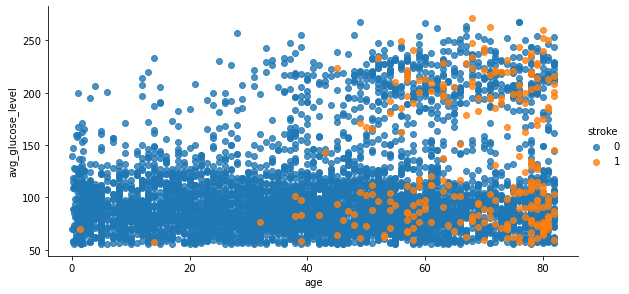

In [60]:
sns.lmplot('age', 'avg_glucose_level', data=strokeDF, fit_reg= False, aspect=2, size =4, hue='stroke')

Old-aged patient has higher chance of getting stroke regardless of their average glucose level.

In [66]:
groupedDF = strokeDF[['gender','work_type','smoking_status','stroke']]
summary = pd.concat([pd.crosstab(groupedDF[x], groupedDF.stroke) for x in groupedDF.columns[:-1]], keys=groupedDF.columns[:-1])
summary

stroke                             0    1
gender         Female           2853  141
               Male             2007  108
               Other               1    0
work_type      Govt_job          624   33
               Never_worked       22    0
               Private          2776  149
               Self-employed     754   65
               children          685    2
smoking_status Unknown          1497   47
               formerly smoked   815   70
               never smoked     1802   90
               smokes            747   42

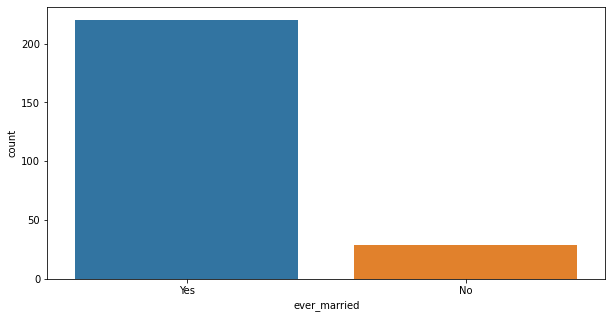

In [67]:
plt.figure(figsize=(10,5))
strok=strokeDF.loc[strokeDF['stroke']==1]
sns.countplot(data=strok,x='ever_married');

From the hsitogram above, it is concluded that getting married increase chances of getting stroke. 😂

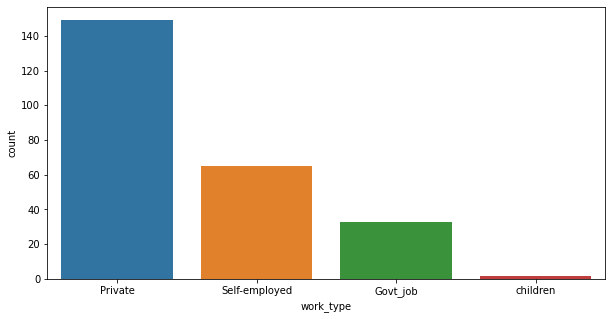

In [68]:
plt.figure(figsize=(10,5))
sns.countplot(data=strok, x='work_type');

Working at private sector has higher chance of getting you a stroke.

This simple EDA on the dataset is performed as part of a university assignment.